In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
data = pd.read_csv('/home/binit/HistoryOfNepal/Amusement_Park_Competitor_Analysis.xlsx - City wise.csv')
data.head(10)

,Unnamed: 0,Unnamed: 1,Total revenue : Ticket price and Total visitor might not be equal as revenue can have multiple sources,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Year,City,Revenue (INR Million),Average Ticket Price (INR),Average Daily Footfalls,Total Visitors,NaN
1,2004,Mumbai,"264,000,000",439,1890,"567,000",Assume other factors and data points as per ne...
2,2005,Mumbai,"271,391,470",454,1956,"586,800",NaN
3,2006,Mumbai,"275,553,195",484,1724,"517,200",NaN
4,2007,Mumbai,"292,316,507",474,1691,"507,300",NaN
5,2008,Mumbai,"326,499,002",492,1681,"504,300",NaN
6,2009,Mumbai,"296,850,632",559,1674,"502,200",NaN
7,2010,Mumbai,"354,993,797",587,1517,"455,100",NaN
8,2011,Mumbai,"420,068,701",587,1682,"504,600",NaN
9,2012,Mumbai,"547,154,710",587,1712,"513,600",NaN


In [57]:
# Reset the index and set the first row as the header
competitor_data_cleaned = data.iloc[1:, :].reset_index(drop=True)
competitor_data_cleaned.columns = data.iloc[0].astype(str)  # Ensure column names are strings

# Drop unnecessary or unnamed columns
competitor_data_cleaned = competitor_data_cleaned.loc[:, ~competitor_data_cleaned.columns.str.contains('^Unnamed')]

# Display the cleaned data for verification
competitor_data_cleaned.head()


,Year,City,Revenue (INR Million),Average Ticket Price (INR),Average Daily Footfalls,Total Visitors,nan
0,2004,Mumbai,"264,000,000",439,1890,"567,000",Assume other factors and data points as per ne...
1,2005,Mumbai,"271,391,470",454,1956,"586,800",NaN
2,2006,Mumbai,"275,553,195",484,1724,"517,200",NaN
3,2007,Mumbai,"292,316,507",474,1691,"507,300",NaN
4,2008,Mumbai,"326,499,002",492,1681,"504,300",NaN


In [58]:
competitor_data_cleaned.isnull().sum()

0
Year                            0
City                            0
 Revenue (INR Million)          0
Average Ticket Price (INR)      0
Average Daily Footfalls         0
Total Visitors                  0
nan                           139
dtype: int64

In [59]:
# Drop columns with 'NaN' in their name or with mostly null values
competitor_data_cleaned = competitor_data_cleaned.dropna(axis=1, how='all')  # Drop completely null columns

# Remove columns named 'nan' if it exists
competitor_data_cleaned = competitor_data_cleaned.loc[:, ~competitor_data_cleaned.columns.str.contains('^nan', na=False)]

# Verify the result
competitor_data_cleaned.head(), competitor_data_cleaned.isnull().sum()

(0  Year    City  Revenue (INR Million) Average Ticket Price (INR)  \
 0  2004  Mumbai           264,000,000                         439   
 1  2005  Mumbai           271,391,470                         454   
 2  2006  Mumbai           275,553,195                         484   
 3  2007  Mumbai           292,316,507                         474   
 4  2008  Mumbai           326,499,002                         492   
 
 0 Average Daily Footfalls Total Visitors  
 0                    1890       567,000   
 1                    1956       586,800   
 2                    1724       517,200   
 3                    1691       507,300   
 4                    1681       504,300   ,
 0
 Year                          0
 City                          0
  Revenue (INR Million)        0
 Average Ticket Price (INR)    0
 Average Daily Footfalls       0
 Total Visitors                0
 dtype: int64)

In [60]:
# Assuming the revenue and ticket price are in INR, convert them to NPR using an approximate exchange rate
exchange_rate = 1.6

# Clean and convert 'Revenue (INR Million)'
competitor_data_cleaned[' Revenue (INR Million)'] = pd.to_numeric(
    competitor_data_cleaned[' Revenue (INR Million)'].replace({',': '', '-': None}, regex=True),
    errors='coerce'
).fillna(0) * exchange_rate

# Clean and convert 'Average Ticket Price (INR)'
competitor_data_cleaned['Average Ticket Price (INR)'] = pd.to_numeric(
    competitor_data_cleaned['Average Ticket Price (INR)'].replace({'-': None}, regex=True),
    errors='coerce'
).fillna(0) * exchange_rate

# Rename the columns to reflect the new currency
competitor_data_cleaned.rename(
    columns={
        ' Revenue (INR Million)': 'Revenue (NPR Million)',
        'Average Ticket Price (INR)': 'Average Ticket Price (NPR)'
    },
    inplace=True
)

# Display the updated data
competitor_data_cleaned.head()

,Year,City,Revenue (NPR Million),Average Ticket Price (NPR),Average Daily Footfalls,Total Visitors
0,2004,Mumbai,422400000.0,702.4,1890,"567,000"
1,2005,Mumbai,434226352.0,726.4,1956,"586,800"
2,2006,Mumbai,440885112.0,774.4,1724,"517,200"
3,2007,Mumbai,467706411.2,758.4,1691,"507,300"
4,2008,Mumbai,522398403.2,787.2,1681,"504,300"


In [61]:
competitor_data_cleaned.to_csv('cleaned_competitor_data_cities.csv', index=False)

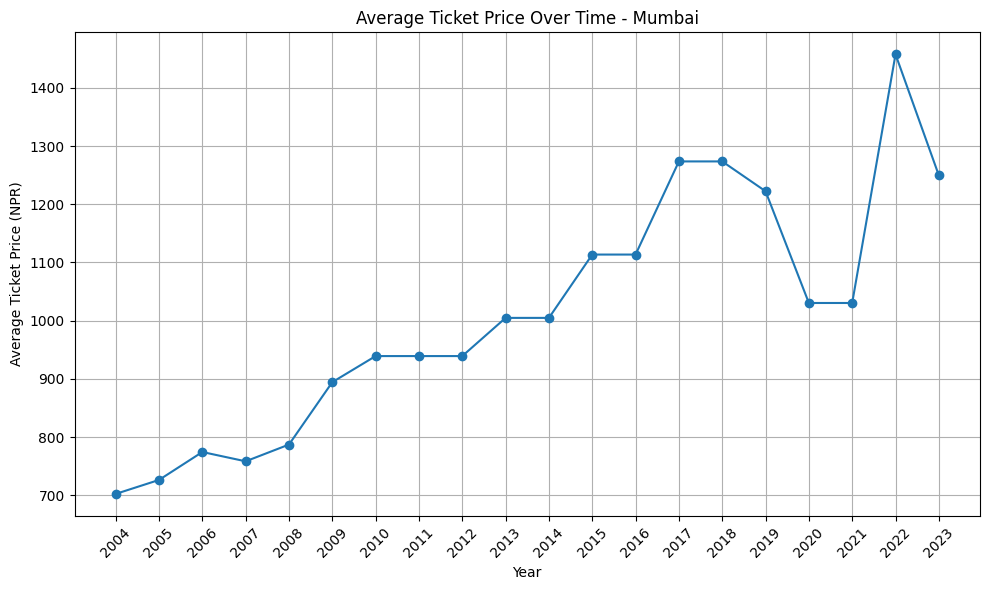

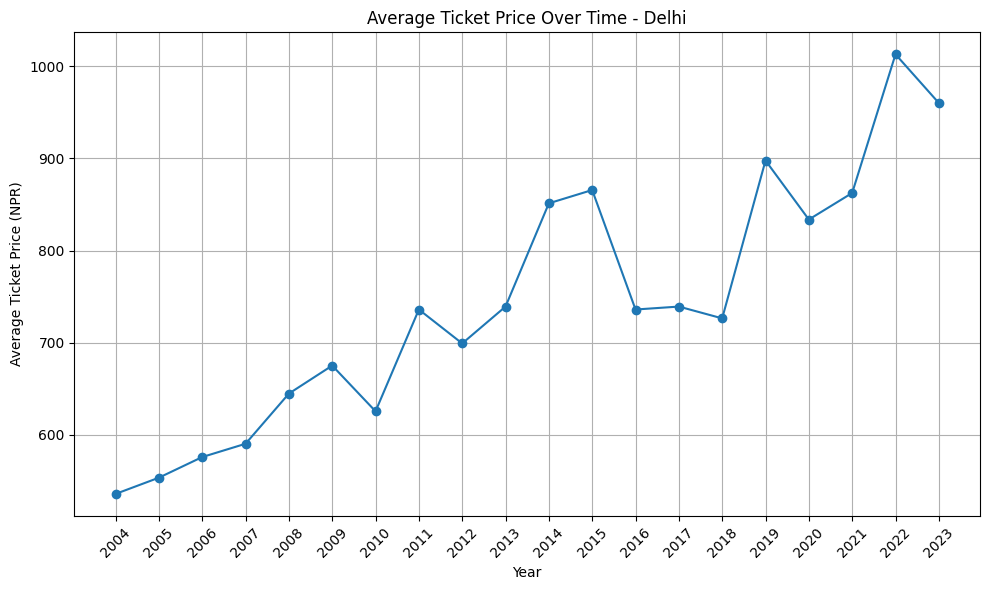

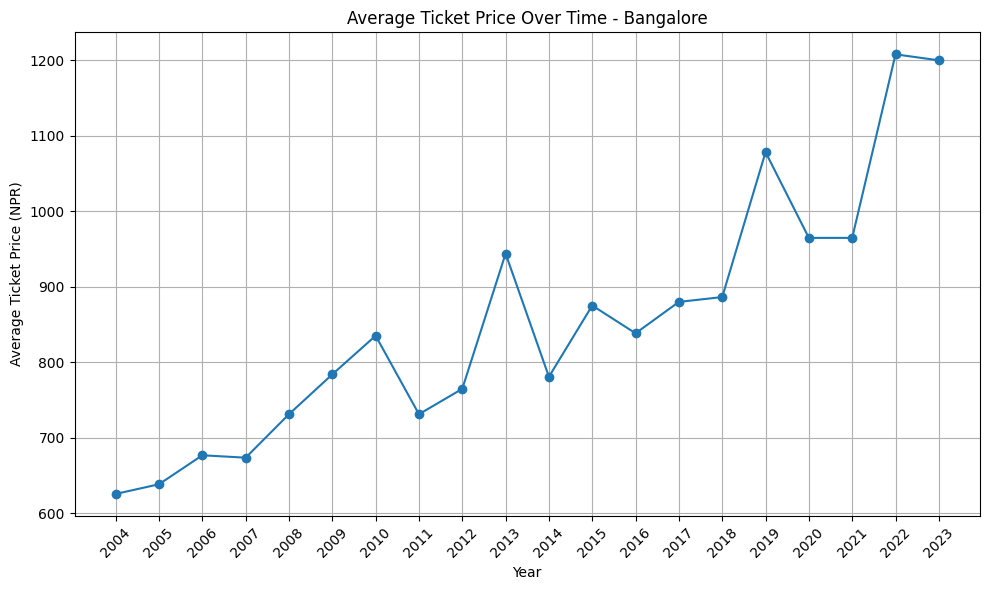

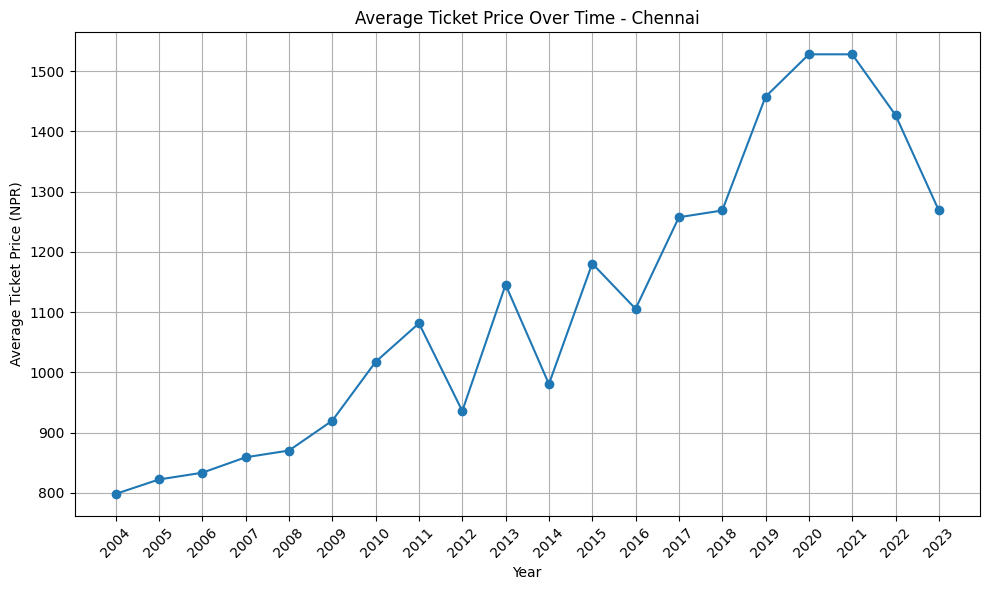

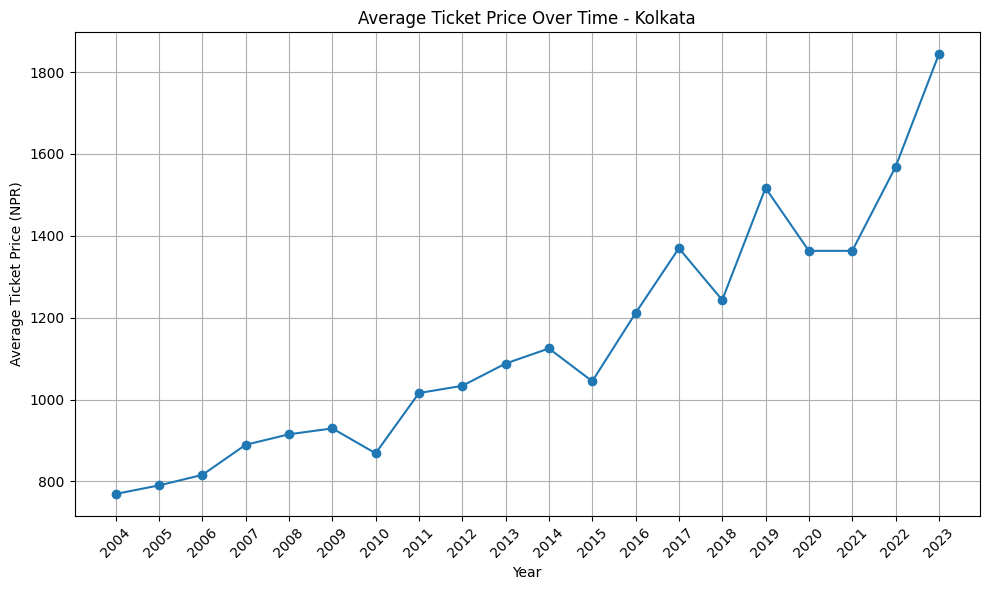

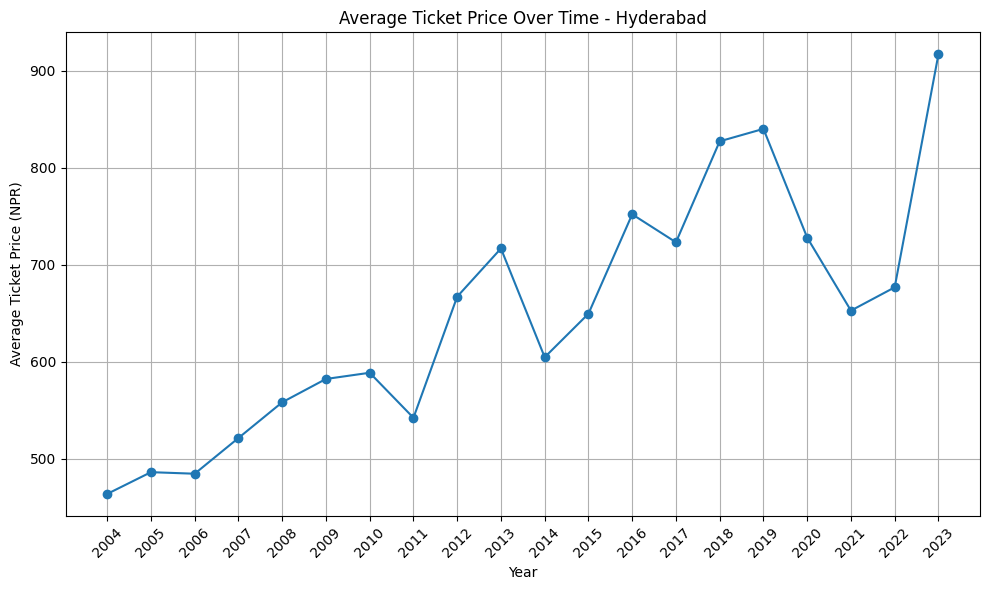

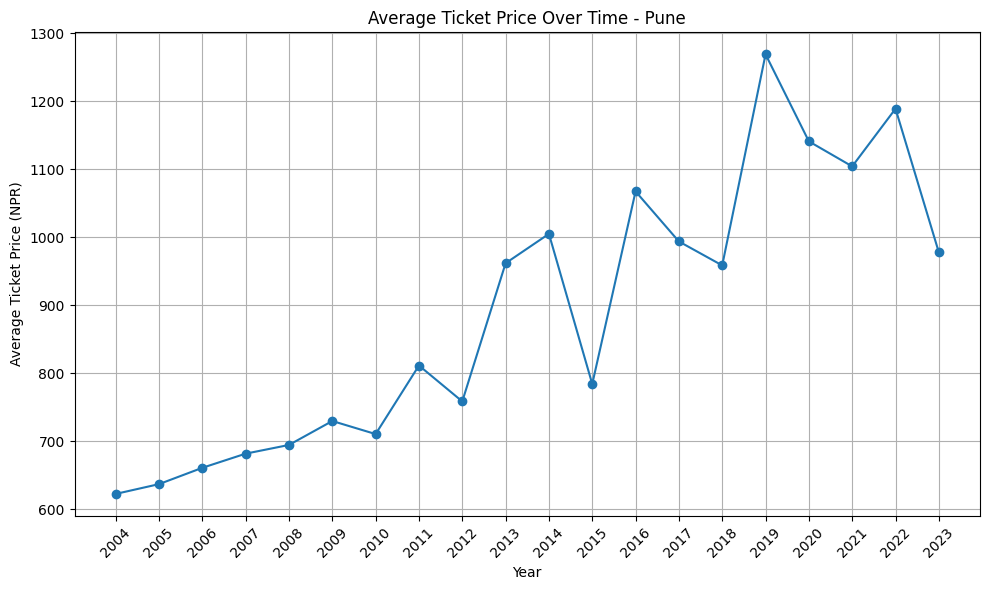

In [62]:
# Ensure the 'City' and 'Average Ticket Price (NPR)' columns are clean
competitor_data_cleaned['City'] = competitor_data_cleaned['City'].astype(str)
competitor_data_cleaned['Average Ticket Price (NPR)'] = competitor_data_cleaned['Average Ticket Price (NPR)'].astype(float)

# Group the data by city
cities = competitor_data_cleaned['City'].unique()

# Create a line plot for each city
for city in cities:
    city_data = competitor_data_cleaned[competitor_data_cleaned['City'] == city]
    plt.figure(figsize=(10, 6))
    plt.plot(city_data['Year'], city_data['Average Ticket Price (NPR)'], marker='o', linestyle='-')
    plt.title(f'Average Ticket Price Over Time - {city}')
    plt.xlabel('Year')
    plt.ylabel('Average Ticket Price (NPR)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [63]:
# Corrected code to calculate and rank average ticket prices for each city in 2023
data_2023 = competitor_data_cleaned[competitor_data_cleaned['Year'] == '2023']

# Calculate the average ticket price for each city in 2023
average_ticket_price_2023 = data_2023.groupby('City')['Average Ticket Price (NPR)'].mean().reset_index()

# Rename the column for clarity
average_ticket_price_2023.rename(columns={'Average Ticket Price (NPR)': 'Average Ticket Price (NPR) 2023'}, inplace=True)

# Rank the cities by average ticket price in descending order
average_ticket_price_2023_ranked = average_ticket_price_2023.sort_values(
    by='Average Ticket Price (NPR) 2023', ascending=False
).reset_index(drop=True)

print(average_ticket_price_2023_ranked)

        City  Average Ticket Price (NPR) 2023
0    Kolkata                           1843.2
1    Chennai                           1268.8
2     Mumbai                           1249.6
3  Bangalore                           1200.0
4       Pune                            977.6
5      Delhi                            960.0
6  Hyderabad                            916.8


In [64]:
average_ticket_price_2023_ranked.head()

,City,Average Ticket Price (NPR) 2023
0,Kolkata,1843.2
1,Chennai,1268.8
2,Mumbai,1249.6
3,Bangalore,1200.0
4,Pune,977.6


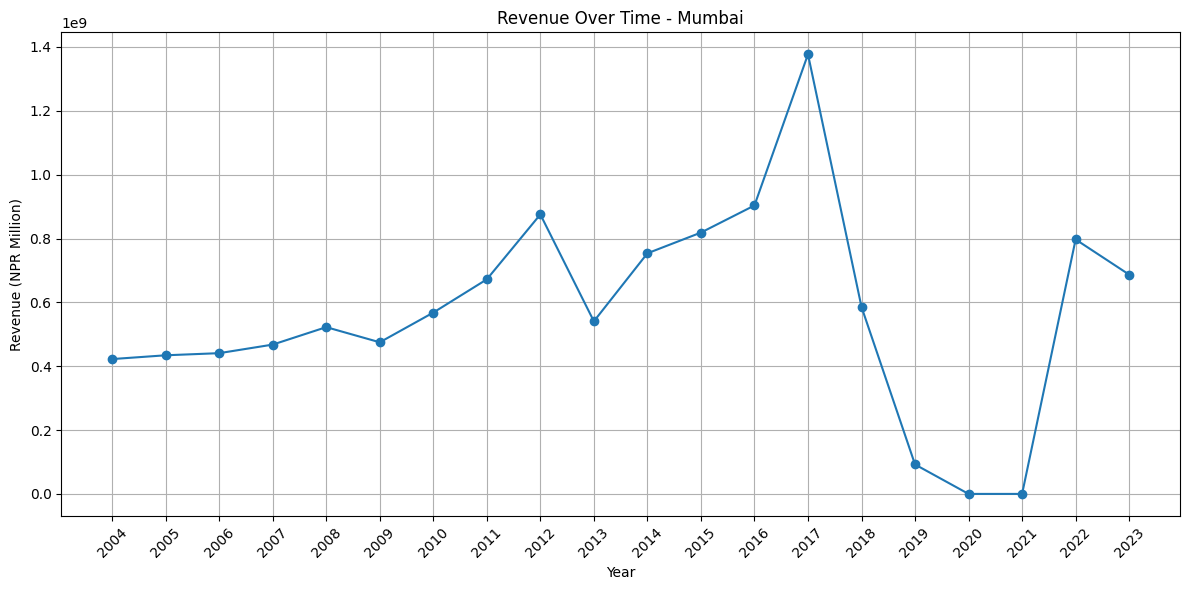

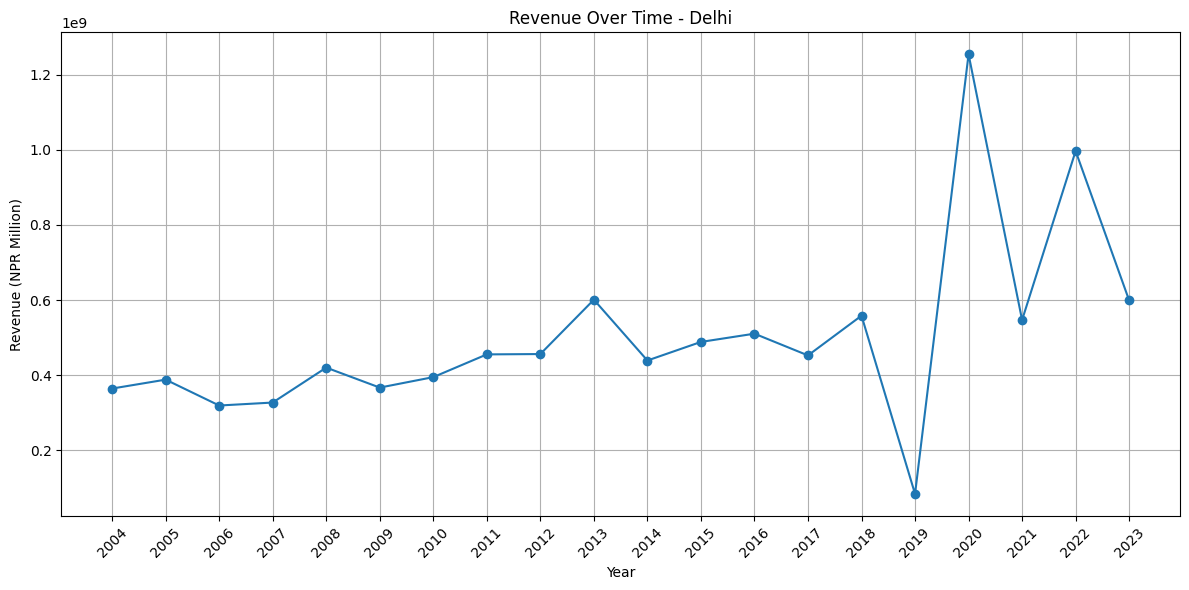

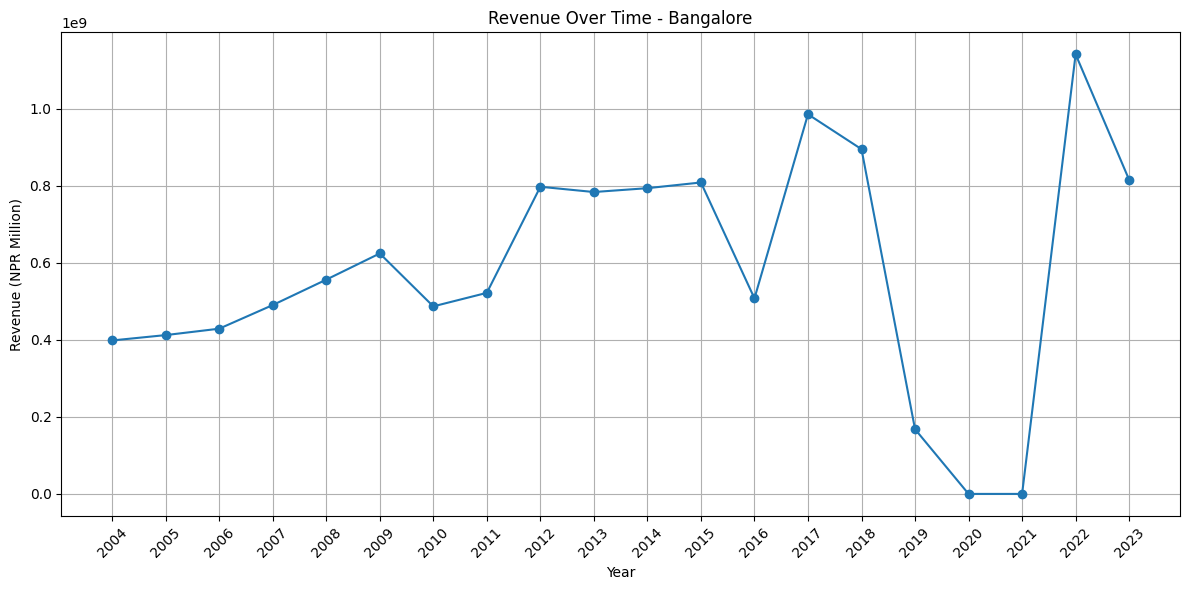

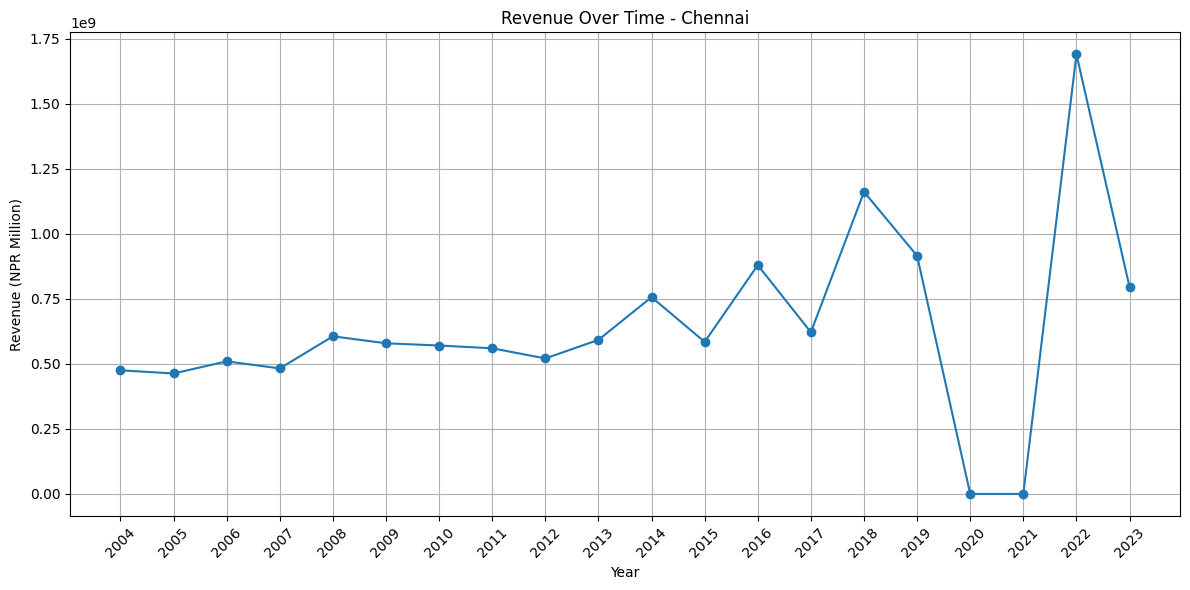

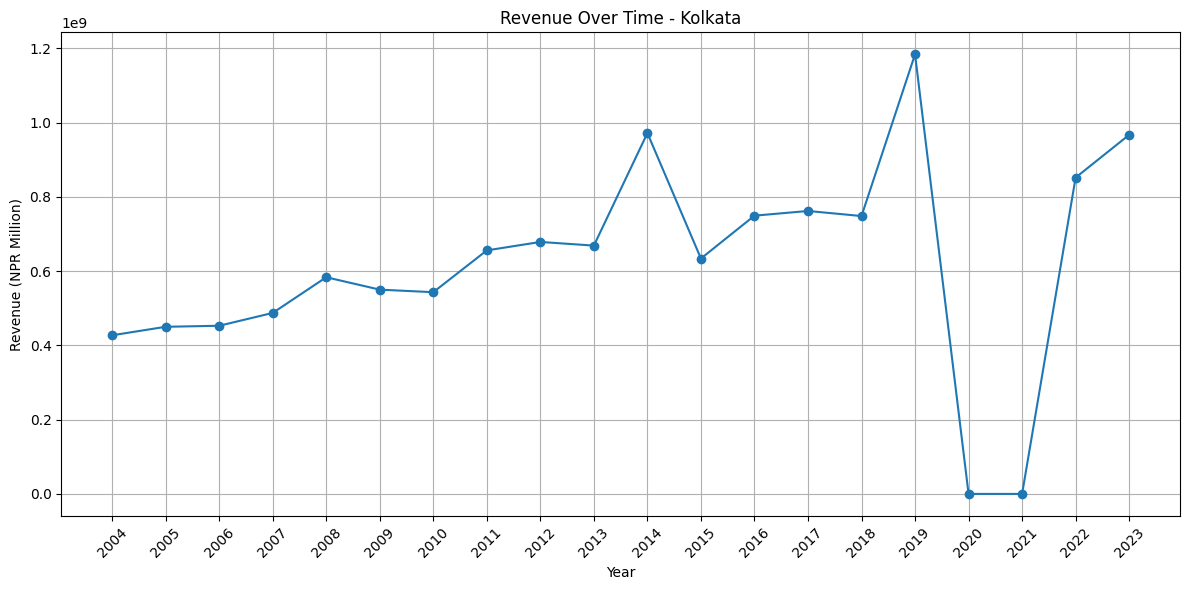

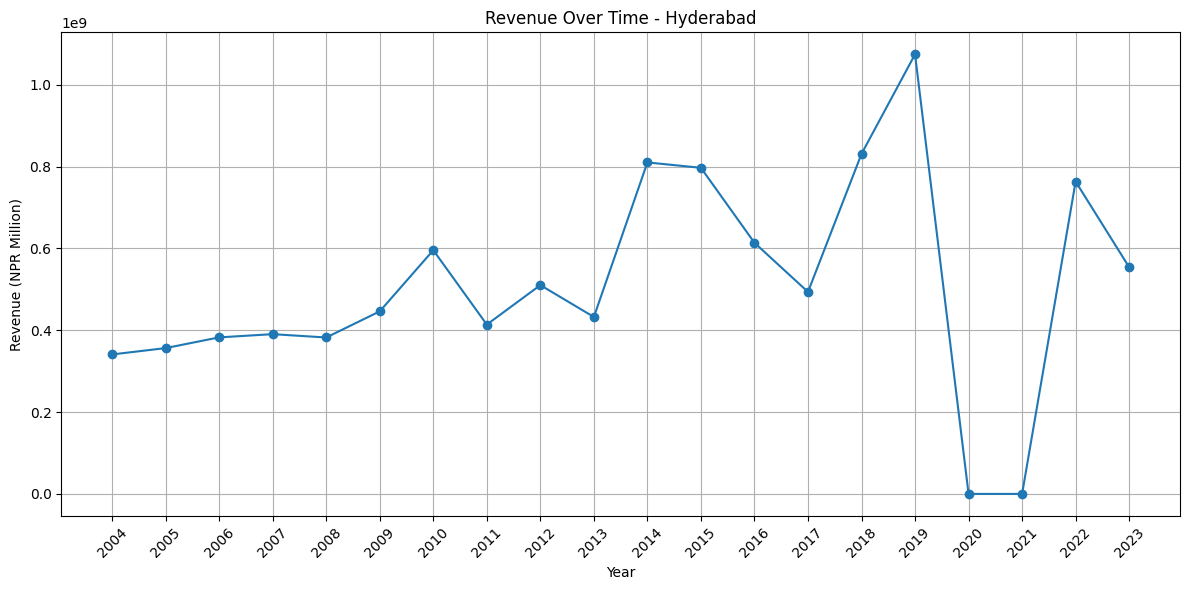

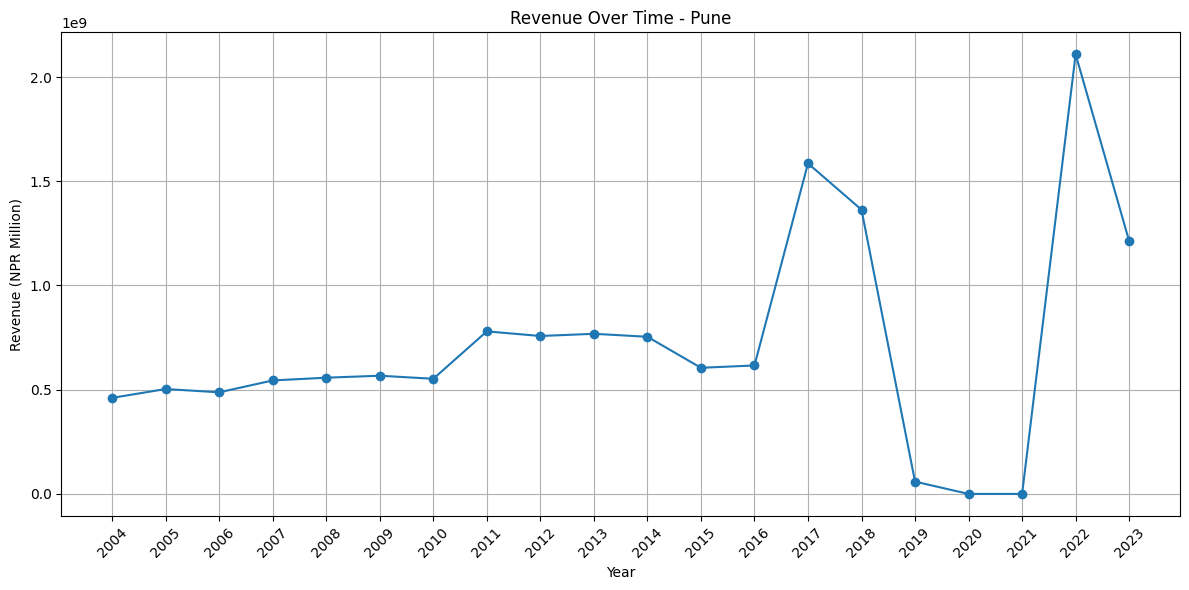

In [65]:
competitor_data_cleaned['Revenue (NPR Million)'] = competitor_data_cleaned['Revenue (NPR Million)'].astype(float)

# Group by city and year for revenue
for city in competitor_data_cleaned['City'].unique():
    city_data = competitor_data_cleaned[competitor_data_cleaned['City'] == city]
    plt.figure(figsize=(12, 6))
    plt.plot(city_data['Year'], city_data['Revenue (NPR Million)'], marker='o', linestyle='-')
    plt.title(f'Revenue Over Time - {city}')
    plt.xlabel('Year')
    plt.ylabel('Revenue (NPR Million)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [66]:
# Calculate total revenue for all time for each city
total_revenue_all_time = competitor_data_cleaned.groupby('City')['Revenue (NPR Million)'].sum().reset_index()
total_revenue_all_time.rename(columns={'Revenue (NPR Million)': 'Total Revenue (NPR Million) All Time'}, inplace=True)

# Filter the data for the year 2023 and calculate total revenue for 2023
data_2023 = competitor_data_cleaned[competitor_data_cleaned['Year'] == '2023']
total_revenue_2023 = data_2023.groupby('City')['Revenue (NPR Million)'].sum().reset_index()
total_revenue_2023.rename(columns={'Revenue (NPR Million)': 'Total Revenue (NPR Million) 2023'}, inplace=True)
print(total_revenue_2023)
print(total_revenue_all_time)


        City  Total Revenue (NPR Million) 2023
0  Bangalore                      8.153912e+08
1    Chennai                      7.952893e+08
2      Delhi                      5.992663e+08
3  Hyderabad                      5.540196e+08
4    Kolkata                      9.670410e+08
5     Mumbai                      6.869246e+08
6       Pune                      1.213380e+09
        City  Total Revenue (NPR Million) All Time
0  Bangalore                          1.161545e+10
1    Chennai                          1.276284e+10
2      Delhi                          1.002838e+10
3  Hyderabad                          1.018637e+10
4    Kolkata                          1.236566e+10
5     Mumbai                          1.143349e+10
6       Pune                          1.428440e+10


In [67]:

# Recheck the data types of the original columns and clean them
total_revenue_all_time = competitor_data_cleaned.groupby('City')['Revenue (NPR Million)'].sum().reset_index()
total_revenue_all_time.rename(columns={'Revenue (NPR Million)': 'Total Revenue (NPR Million) All Time'}, inplace=True)

data_2023 = competitor_data_cleaned[competitor_data_cleaned['Year'] == '2023']
total_revenue_2023 = data_2023.groupby('City')['Revenue (NPR Million)'].sum().reset_index()
total_revenue_2023.rename(columns={'Revenue (NPR Million)': 'Total Revenue (NPR Million) 2023'}, inplace=True)

# Ensure columns are numeric
total_revenue_all_time['Total Revenue (NPR Million) All Time'] = pd.to_numeric(
    total_revenue_all_time['Total Revenue (NPR Million) All Time'], errors='coerce'
)
total_revenue_2023['Total Revenue (NPR Million) 2023'] = pd.to_numeric(
    total_revenue_2023['Total Revenue (NPR Million) 2023'], errors='coerce'
)

# Format the revenue values
total_revenue_all_time['Total Revenue (NPR Million) All Time'] = total_revenue_all_time[
    'Total Revenue (NPR Million) All Time'
].apply(lambda x: f"{x:,.2f} NPR" if pd.notnull(x) else "N/A")

total_revenue_2023['Total Revenue (NPR Million) 2023'] = total_revenue_2023[
    'Total Revenue (NPR Million) 2023'
].apply(lambda x: f"{x:,.2f} NPR" if pd.notnull(x) else "N/A")

# Merge both tables
total_revenue_combined = pd.merge(
    total_revenue_all_time,
    total_revenue_2023,
    on='City',
    how='outer'
)



In [68]:
# Convert the revenue values to millions for easier readability
total_revenue_all_time['Total Revenue (NPR Million) All Time'] = pd.to_numeric(
    total_revenue_all_time['Total Revenue (NPR Million) All Time'].str.replace(' NPR', '').replace(',', '', regex=True),
    errors='coerce'
) / 1_000_000

total_revenue_2023['Total Revenue (NPR Million) 2023'] = pd.to_numeric(
    total_revenue_2023['Total Revenue (NPR Million) 2023'].str.replace(' NPR', '').replace(',', '', regex=True),
    errors='coerce'
) / 1_000_000

# Round the values and reformat them with "Million NPR"
total_revenue_all_time['Total Revenue (NPR Million) All Time'] = total_revenue_all_time[
    'Total Revenue (NPR Million) All Time'
].apply(lambda x: f"{x:,.2f} Million NPR" if pd.notnull(x) else "N/A")

total_revenue_2023['Total Revenue (NPR Million) 2023'] = total_revenue_2023[
    'Total Revenue (NPR Million) 2023'
].apply(lambda x: f"{x:,.2f} Million NPR" if pd.notnull(x) else "N/A")

# Merge both tables
total_revenue_combined = pd.merge(
    total_revenue_all_time,
    total_revenue_2023,
    on='City',
    how='outer'
)




In [69]:
total_revenue_2023.head()



,City,Total Revenue (NPR Million) 2023
0,Bangalore,815.39 Million NPR
1,Chennai,795.29 Million NPR
2,Delhi,599.27 Million NPR
3,Hyderabad,554.02 Million NPR
4,Kolkata,967.04 Million NPR


In [70]:
total_revenue_all_time.head()

,City,Total Revenue (NPR Million) All Time
0,Bangalore,"11,615.45 Million NPR"
1,Chennai,"12,762.84 Million NPR"
2,Delhi,"10,028.38 Million NPR"
3,Hyderabad,"10,186.37 Million NPR"
4,Kolkata,"12,365.66 Million NPR"


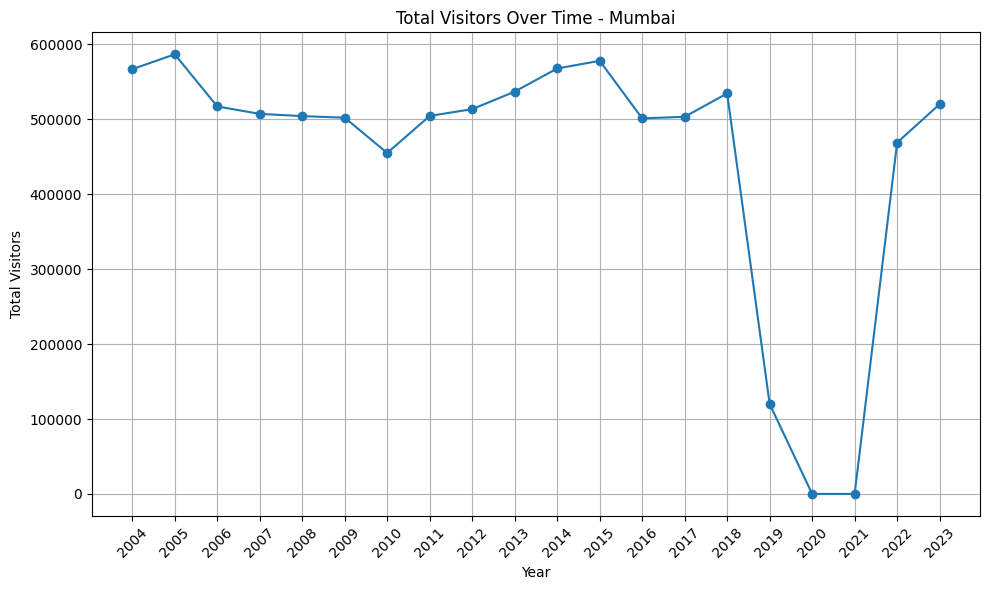

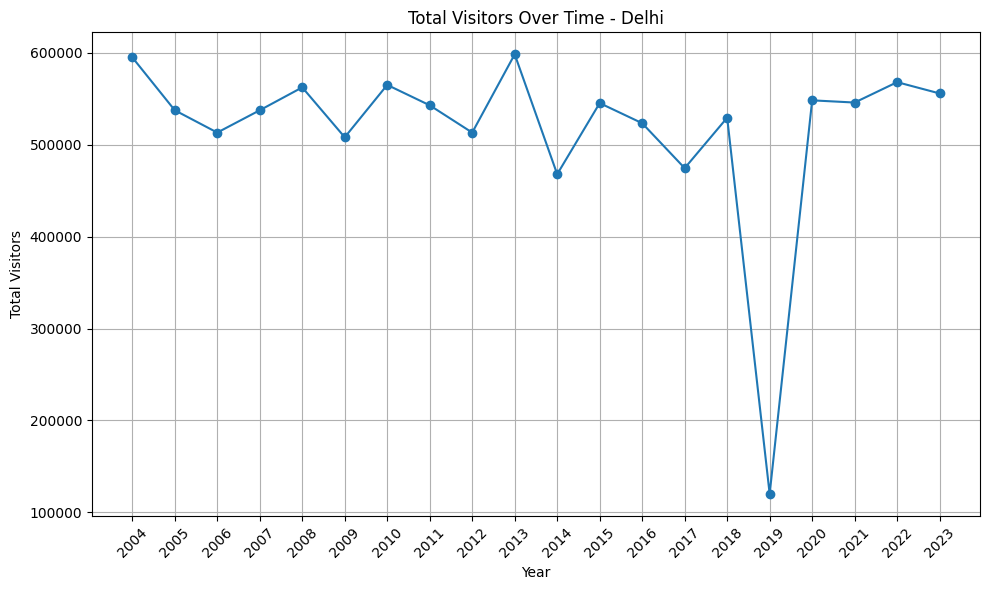

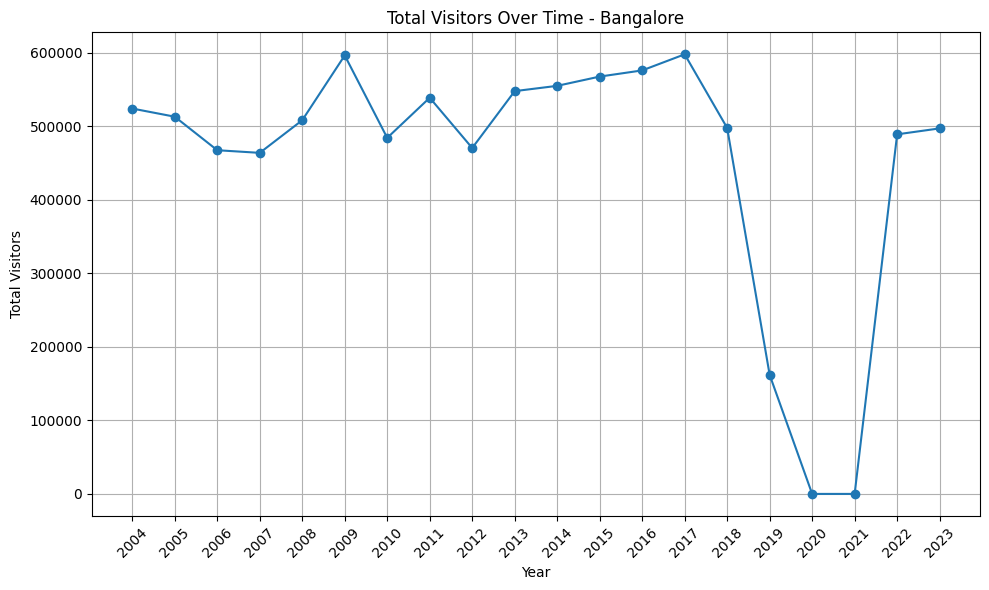

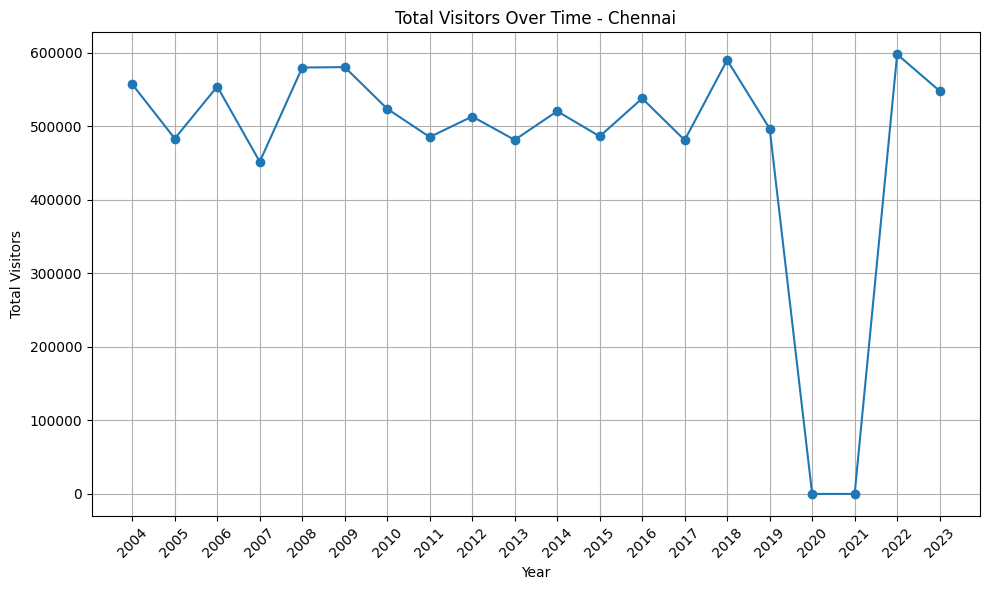

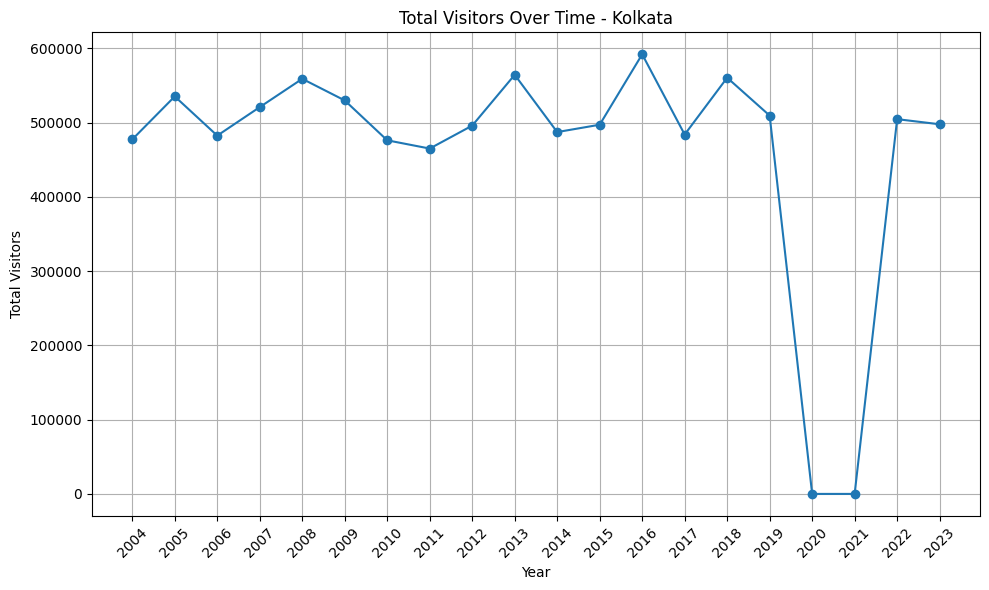

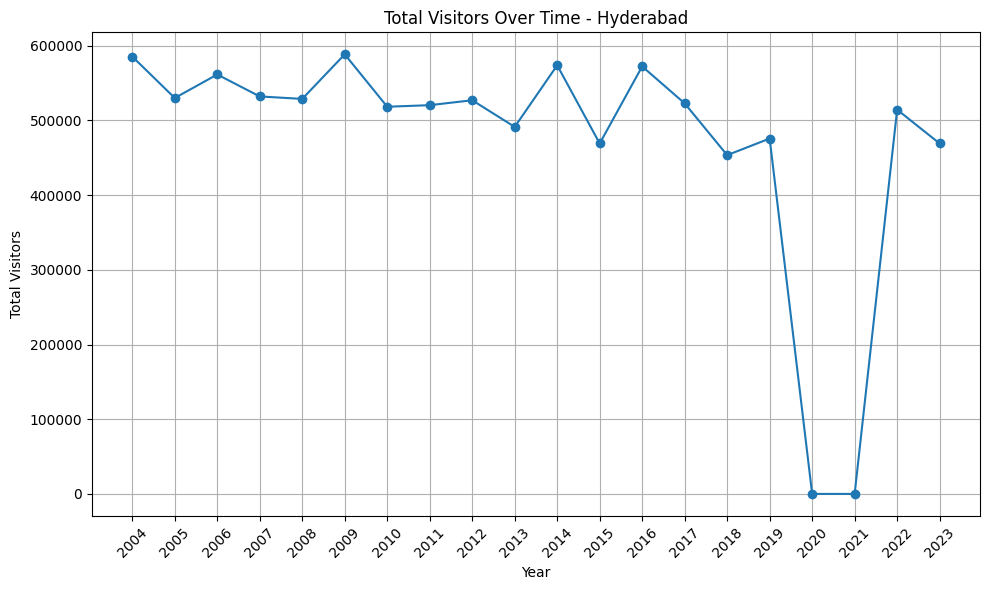

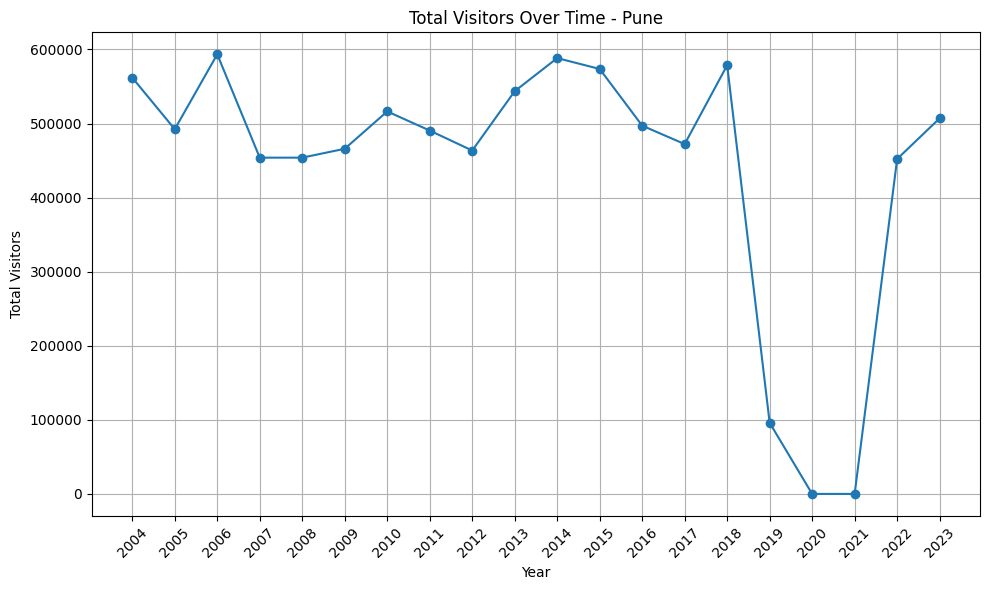

In [71]:
# Ensure the 'Total Visitors' column is numeric for visualization
competitor_data_cleaned['Total Visitors'] = competitor_data_cleaned['Total Visitors'].replace(
    {',': '', '-': '0'}, regex=True).astype(float)

# Create a line graph for total visitors over time for each city
for city in competitor_data_cleaned['City'].unique():
    city_data = competitor_data_cleaned[competitor_data_cleaned['City'] == city]
    plt.figure(figsize=(10, 6))
    plt.plot(city_data['Year'], city_data['Total Visitors'], marker='o', linestyle='-')
    plt.title(f'Total Visitors Over Time - {city}')
    plt.xlabel('Year')
    plt.ylabel('Total Visitors')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [72]:
import pandas as pd


# Re-process the 'Total Visitors' column to ensure it's numeric
competitor_data_cleaned['Total Visitors'] = pd.to_numeric(
    competitor_data_cleaned['Total Visitors'], errors='coerce'
)

# Filter the data for 2023
data_2023 = competitor_data_cleaned[competitor_data_cleaned['Year'] == '2023']

# Calculate total visitors for each city in 2023
total_visitors_2023 = data_2023.groupby('City')['Total Visitors'].sum().reset_index()
total_visitors_2023.rename(columns={'Total Visitors': 'Total Visitors in 2023'}, inplace=True)

# Sort the total visitors in 2023 from highest to lowest
total_visitors_2023 = total_visitors_2023.sort_values(by='Total Visitors in 2023', ascending=False)

# Format the total visitors for better readability with commas
total_visitors_2023['Total Visitors in 2023'] = total_visitors_2023['Total Visitors in 2023'].apply(
    lambda x: f"{x:,.0f}" if pd.notnull(x) else "N/A"
)

print(total_visitors_2023)

        City Total Visitors in 2023
2      Delhi                555,900
1    Chennai                548,100
5     Mumbai                520,200
6       Pune                507,000
4    Kolkata                497,700
0  Bangalore                497,400
3  Hyderabad                469,200


In [73]:
total_revenue_2023.head()

,City,Total Revenue (NPR Million) 2023
0,Bangalore,815.39 Million NPR
1,Chennai,795.29 Million NPR
2,Delhi,599.27 Million NPR
3,Hyderabad,554.02 Million NPR
4,Kolkata,967.04 Million NPR


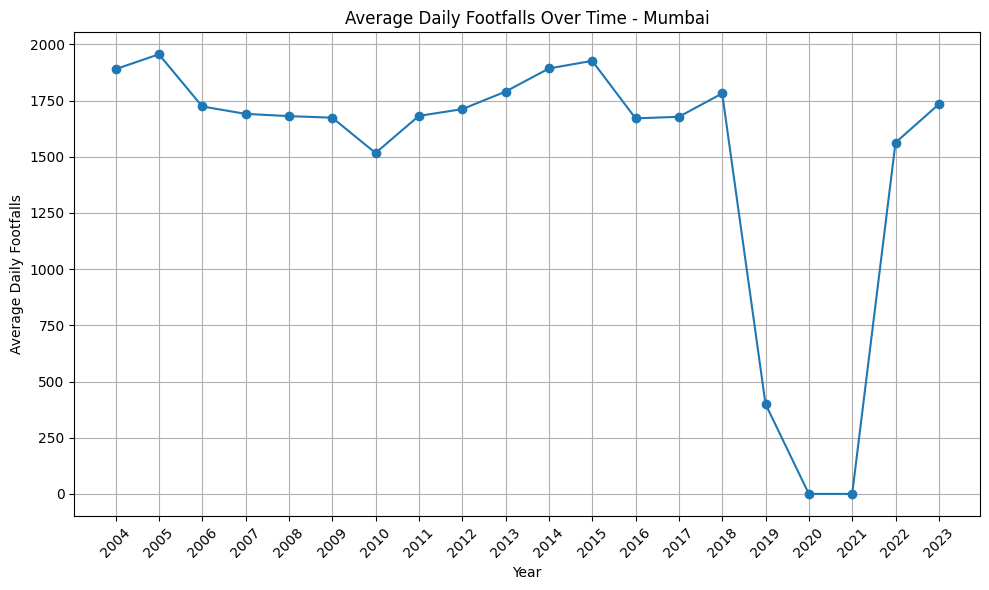

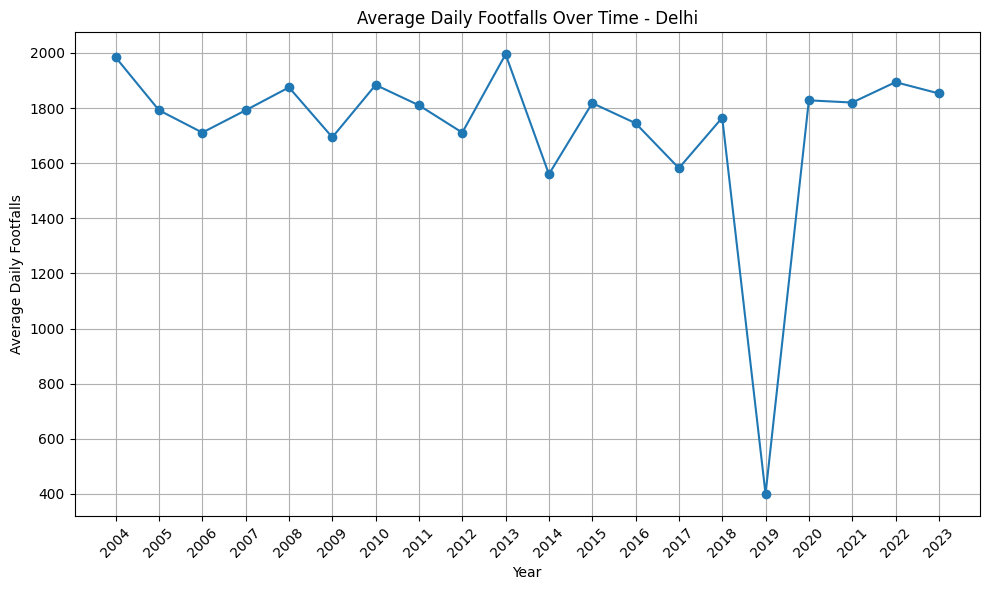

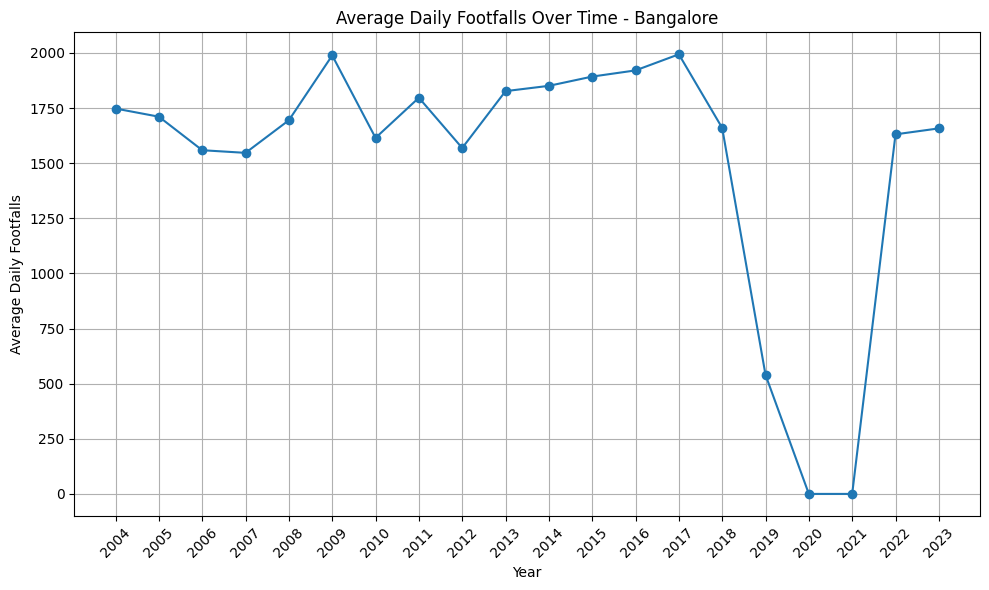

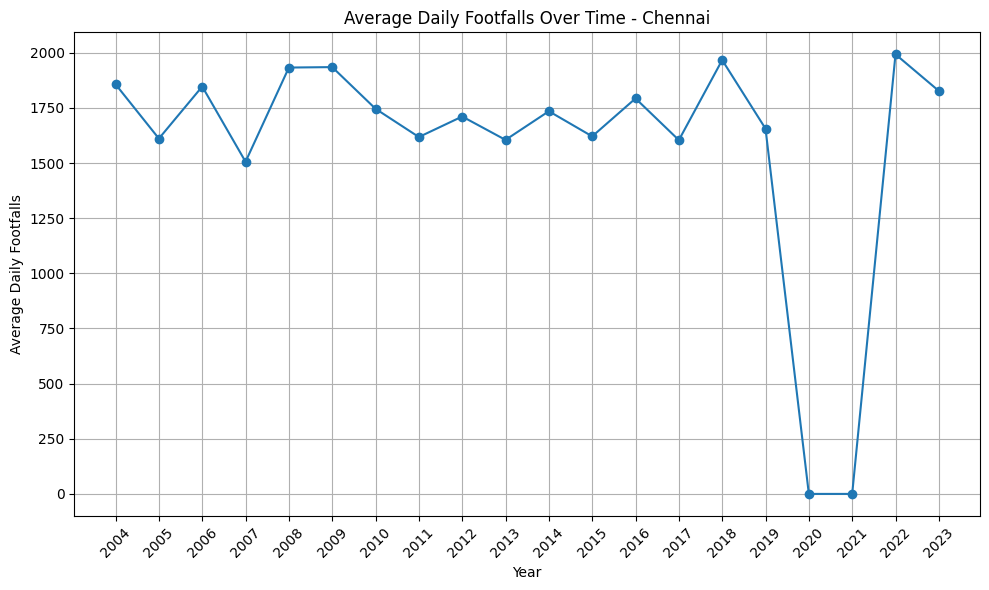

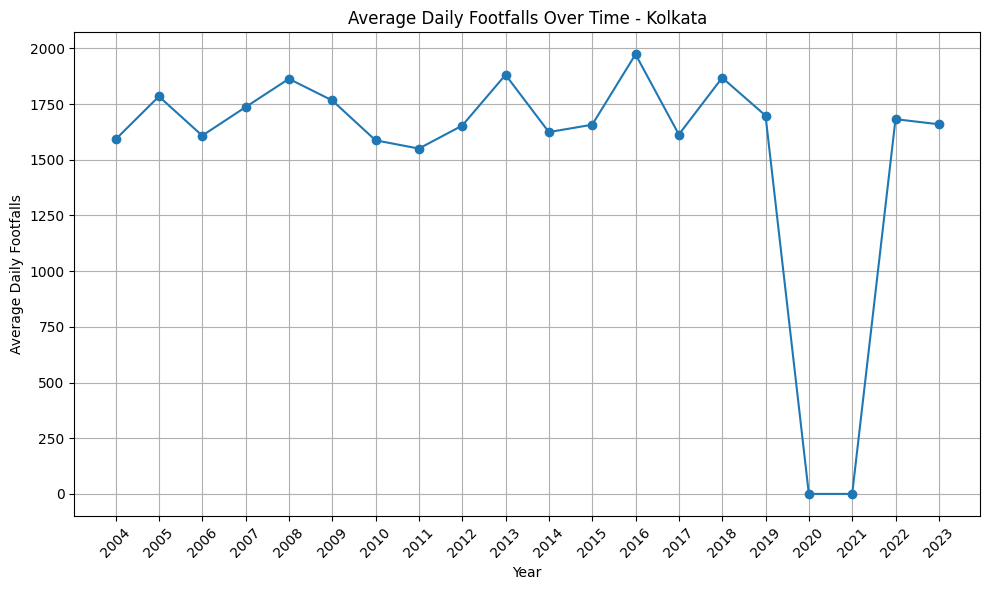

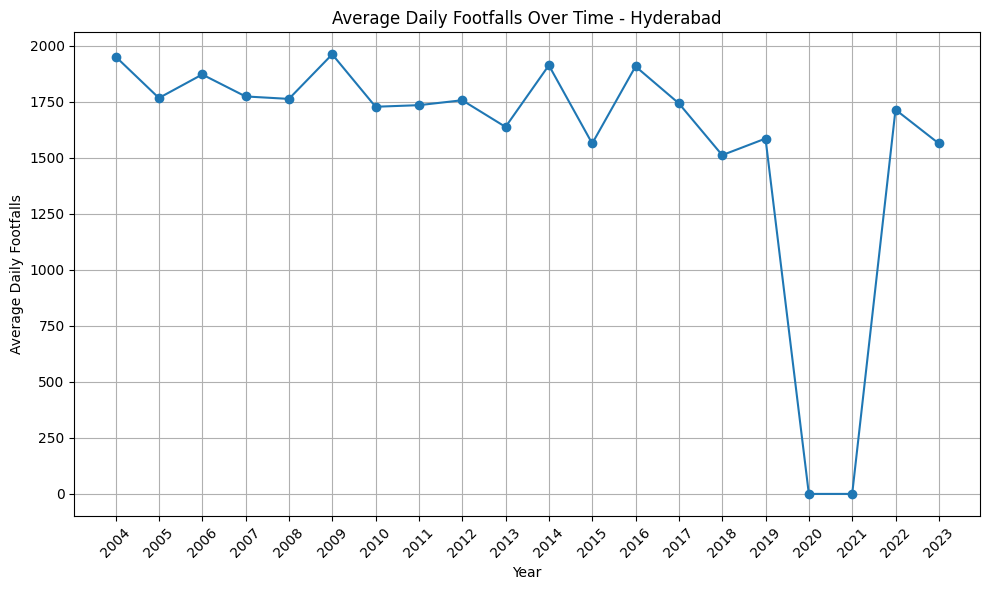

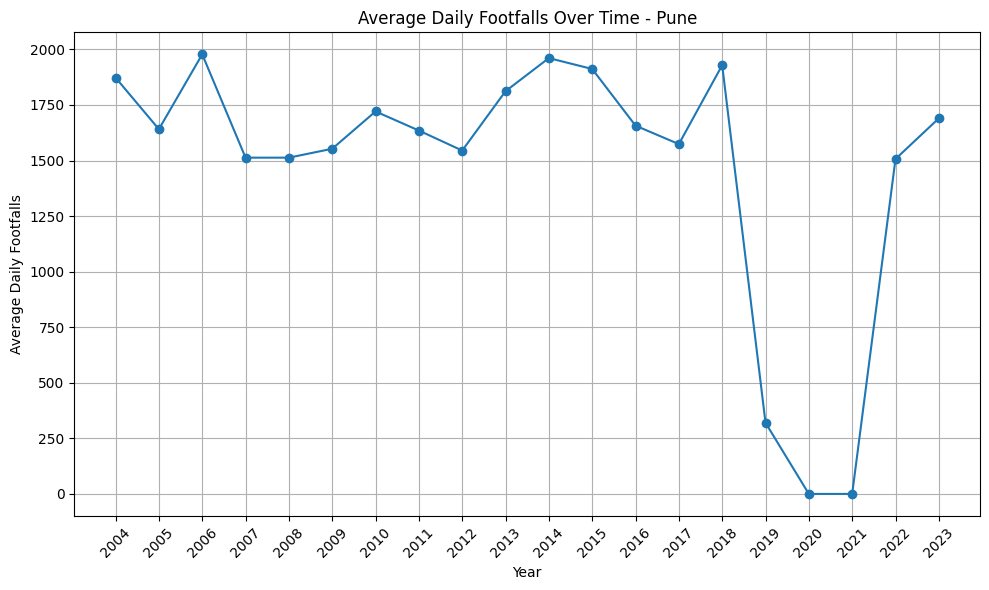

In [74]:
# Ensure 'Average Daily Footfalls' is numeric for visualization
competitor_data_cleaned['Average Daily Footfalls'] = pd.to_numeric(
    competitor_data_cleaned['Average Daily Footfalls'], errors='coerce'
)

# Create a line graph for average daily footfalls over time for each city
for city in competitor_data_cleaned['City'].unique():
    city_data = competitor_data_cleaned[competitor_data_cleaned['City'] == city]
    plt.figure(figsize=(10, 6))
    plt.plot(city_data['Year'], city_data['Average Daily Footfalls'], marker='o', linestyle='-')
    plt.title(f'Average Daily Footfalls Over Time - {city}')
    plt.xlabel('Year')
    plt.ylabel('Average Daily Footfalls')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [75]:
# Filter the data for the year 2023
data_2023 = competitor_data_cleaned[competitor_data_cleaned['Year'] == '2023']

# Calculate average daily footfalls for each city in 2023
average_footfalls_2023 = data_2023.groupby('City')['Average Daily Footfalls'].mean().reset_index()
average_footfalls_2023.rename(columns={'Average Daily Footfalls': 'Average Daily Footfalls in 2023'}, inplace=True)

average_footfalls_2023 = average_footfalls_2023.sort_values(
    by='Average Daily Footfalls in 2023', ascending=False
)


# Format the average footfalls for better readability
average_footfalls_2023['Average Daily Footfalls in 2023'] = average_footfalls_2023['Average Daily Footfalls in 2023'].apply(
    lambda x: f"{x:,.0f}" if pd.notnull(x) else "N/A"
)



In [76]:
average_footfalls_2023.head()

,City,Average Daily Footfalls in 2023
2,Delhi,"1,853"
1,Chennai,"1,827"
5,Mumbai,"1,734"
6,Pune,"1,690"
4,Kolkata,"1,659"
